# EDA on full dataset 

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 50)

import numpy as np
import pickle
import matplotlib.pyplot as plt

In [2]:
# pull in data
df = pd.read_pickle("../../../data/prd/Paper/FR_meta_and_final_tokens_23DEC21.pkl")

In [3]:
df.head()

,PROJECT_ID,ABSTRACT,PROJECT_TERMS,PROJECT_TITLE,DEPARTMENT,AGENCY,IC_CENTER,PROJECT_NUMBER,PROJECT_START_DATE,PROJECT_END_DATE,CONTACT_PI_PROJECT_LEADER,OTHER_PIS,CONGRESSIONAL_DISTRICT,DUNS_NUMBER,ORGANIZATION_NAME,ORGANIZATION_CITY,ORGANIZATION_STATE,ORGANIZATION_ZIP,ORGANIZATION_COUNTRY,BUDGET_START_DATE,BUDGET_END_DATE,CFDA_CODE,FY,FY_TOTAL_COST,FY_TOTAL_COST_SUB_PROJECTS,ORG_COUNT,PI_COUNT,FY_TOTAL_COST_SUM,NUM_RECORDS,final_tokens
0,89996,"This is a project to explore Game-based, Metap...",Achievement; analog; base; Cognitive Science; ...,RUI: CYGAMES: CYBER-ENABLED TEACHING AND LEARN...,NSF,NSF,NaN,0814512,9/15/2008,8/31/2012,"REESE, DEBBIE D","CARTER, BEVERLY; WOOD, CHARLES; HITT, BEN",01,068719400,WHEELING JESUIT UNIVERSITY,WHEELING,WV,26003-6243,UNITED STATES,NaN,NaN,47.076,2008,1999467.0,NaN,1,1,1999467.0,1,project explore game base metaphor enhanced ga...
1,89997,Institution: Franklin Institute Science Museum...,Active Learning; Child; Computer software; des...,ARIEL - AUGMENTED REALITY FOR INTERPRETIVE AND...,NSF,NSF,NaN,0741659,9/15/2008,8/31/2012,"SNYDER, STEVEN","ELINICH, KAREN; YOON, SUSAN",02,001741859,FRANKLIN INSTITUTE,PHILADELPHIA,PA,19103-1115,UNITED STATES,NaN,NaN,47.076,2008,1799699.0,NaN,1,1,1799699.0,1,institution franklin institute science museum ...
2,89998,Through programs (including small group conver...,Address; Age; Birth; Brain; Caregivers; Child;...,BRIGHTER FUTURES: PUBLIC DELIBERATION ABOUT TH...,NSF,NSF,NaN,0813522,9/15/2008,8/31/2011,"FINK, LAURIE KLEINBAUM","CADIGAN, KAREN; ELLENBOGEN, KIRSTEN",04,061451670,SCIENCE MUSEUM OF MINNESOTA,SAINT PAUL,MN,55102-1202,UNITED STATES,NaN,NaN,47.076,2008,1505858.0,NaN,1,1,1505858.0,1,program include small group conversation citiz...
3,89999,In partnership with the American Chemical Soci...,Advanced Development; American; Chemicals; Che...,FOSTERING US-INTERNATIONAL COLLABORATIVE PARTN...,NSF,NSF,NaN,0838627,8/1/2008,12/31/2010,"JOST, JOHN W","MILLER, BRADLEY; BOWMAN, KATHERINE",04,009059242,INTERNATIONAL UNION OF PURE AND APPLIED CHEMISTRY,DURHAM,NC,27709-3757,UNITED STATES,NaN,NaN,47.049,2008,51000.0,NaN,1,1,51000.0,1,partnership american chemical society acs nati...
4,90001,The Center for Molecular Interfacing (CMI) wil...,Address; Architecture; Carbon Nanotubes; Catal...,CCI PHASE I: CENTER FOR MOLECULAR INTERFACING,NSF,NSF,NaN,0847926,10/1/2008,9/30/2011,"ABRUNA, HECTOR D",NaN,22,872612445,CORNELL UNIVERSITY ITHACA,ITHACA,NY,14850-2820,UNITED STATES,NaN,NaN,47.049,2008,1519821.0,NaN,1,1,1519821.0,1,center molecular interfacing cmi enable integr...


In [4]:
df.shape

(1143869, 30)

In [5]:
df.dtypes

PROJECT_ID                     object
ABSTRACT                       object
PROJECT_TERMS                  object
PROJECT_TITLE                  object
DEPARTMENT                     object
AGENCY                         object
IC_CENTER                      object
PROJECT_NUMBER                 object
PROJECT_START_DATE             object
PROJECT_END_DATE               object
CONTACT_PI_PROJECT_LEADER      object
OTHER_PIS                      object
CONGRESSIONAL_DISTRICT         object
DUNS_NUMBER                    object
ORGANIZATION_NAME              object
ORGANIZATION_CITY              object
ORGANIZATION_STATE             object
ORGANIZATION_ZIP               object
ORGANIZATION_COUNTRY           object
BUDGET_START_DATE              object
BUDGET_END_DATE                object
CFDA_CODE                      object
FY                             object
FY_TOTAL_COST                 float64
FY_TOTAL_COST_SUB_PROJECTS    float64
ORG_COUNT                       int64
PI_COUNT    

In [6]:
df.isnull().sum()

PROJECT_ID                         0
ABSTRACT                           0
PROJECT_TERMS                  46981
PROJECT_TITLE                      1
DEPARTMENT                         0
AGENCY                             0
IC_CENTER                     198070
PROJECT_NUMBER                     0
PROJECT_START_DATE            151060
PROJECT_END_DATE              143183
CONTACT_PI_PROJECT_LEADER      21828
OTHER_PIS                     995097
CONGRESSIONAL_DISTRICT         93555
DUNS_NUMBER                    15185
ORGANIZATION_NAME               1850
ORGANIZATION_CITY              30357
ORGANIZATION_STATE             37046
ORGANIZATION_ZIP               70625
ORGANIZATION_COUNTRY           30145
BUDGET_START_DATE             258598
BUDGET_END_DATE               258790
CFDA_CODE                     195012
FY                                 0
FY_TOTAL_COST                 208196
FY_TOTAL_COST_SUB_PROJECTS    975585
ORG_COUNT                          0
PI_COUNT                           0
F

In [7]:
# agency distribution

df["DEPARTMENT"].value_counts()

HHS     927536
NSF     143295
USDA     31445
NASA     15949
VA       13569
DOD       8196
ED        2339
EPA       1540
Name: DEPARTMENT, dtype: int64

In [8]:
agency_counts = 100*df["DEPARTMENT"].value_counts()/len(df)
print(agency_counts)

HHS     81.087607
NSF     12.527221
USDA     2.749004
NASA     1.394303
VA       1.186237
DOD      0.716516
ED       0.204481
EPA      0.134631
Name: DEPARTMENT, dtype: float64


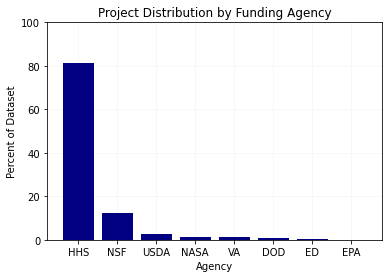

In [15]:
# plot
agency = agency_counts.index.tolist()
count = agency_counts.values

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_axisbelow(True)
plt.grid(True, color = "whitesmoke")
plt.bar(agency, count, color='navy')
plt.ylim(0,100)
plt.xlabel("Agency")
plt.ylabel("Percent of Dataset")
plt.title("Project Distribution by Funding Agency")

#plt.savefig("agency_dist.png", dpi = 800, bbox_inches = "tight")
#plt.savefig("agency_dist.pdf", dpi = 800, bbox_inches = "tight")

In [10]:
year_counts = df['FY'].value_counts().sort_index(ascending=True)
print(year_counts)

2008     95722
2009    103529
2010     99478
2011     88839
2012     81811
2013     82375
2014     81355
2015     82978
2016     84182
2017     82337
2018     85819
2019     86303
2020     89141
Name: FY, dtype: int64


In [11]:
100*df["FY"].value_counts()/len(df)

2009    9.050774
2010    8.696625
2008    8.368266
2020    7.792938
2011    7.766536
2019    7.544832
2018    7.502520
2016    7.359409
2015    7.254152
2013    7.201437
2017    7.198114
2012    7.152130
2014    7.112265
Name: FY, dtype: float64

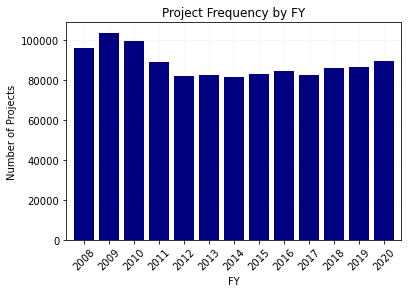

In [14]:
# plot
year = year_counts.index.tolist()
count = year_counts.values

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_axisbelow(True)
plt.grid(True, color = "whitesmoke")
plt.bar(year, count, color='navy')
plt.xlim(-0.7, len(year)-0.3)
plt.xticks(year, rotation=45)
#x_ticks = ax.xaxis.get_major_ticks()
#x_ticks[-1].label1.set_visible(False)
plt.xlabel("FY")
plt.ylabel("Number of Projects")
plt.title("Project Frequency by FY")

#plt.savefig("startyr_freq.png", dpi = 800, bbox_inches = "tight")
#plt.savefig("startyr_freq.pdf", dpi = 800, bbox_inches = "tight")

In [31]:
# find number of projects funded by NIH

df["AGENCY"].value_counts()

NIH        908739
NSF        143295
NIFA        25593
NASA        15949
VA          13569
CDMRP        7591
ALLCDC       6701
AHRQ         5750
ARS          4813
FDA          4810
IES          2339
EPA          1540
FS           1039
NIDILRR       810
DVBIC         451
CDC           430
ACF           296
CNRM          131
CCCRP          23
Name: AGENCY, dtype: int64

In [32]:
100*908739/927536

97.97344793086198

### Organization Names

Are these mainly colleges/universities?

In [33]:
df['ORGANIZATION_NAME'].isna().sum()

1850

In [35]:
df['ORGANIZATION_NAME'].value_counts()[20:40]

UNIVERSITY OF CALIFORNIA DAVIS            9917
HARVARD UNIVERSITY                        9887
BRIGHAM AND WOMEN'S HOSPITAL              9359
UNIVERSITY OF ALABAMA AT BIRMINGHAM       8842
UNIVERSITY OF COLORADO DENVER             8652
BAYLOR COLLEGE OF MEDICINE                8644
NORTHWESTERN UNIVERSITY AT CHICAGO        8364
MOUNT SINAI SCHOOL OF MEDICINE            8354
UNIVERSITY OF CHICAGO                     8346
OHIO STATE UNIVERSITY                     8065
UNIVERSITY OF SOUTHERN CALIFORNIA         8053
OREGON HEALTH AND SCIENCE UNIVERSITY      8039
UNIVERSITY OF FLORIDA                     7836
UNIVERSITY OF CALIFORNIA BERKELEY         7482
UNIVERSITY OF IOWA                        7273
UNIVERSITY OF UTAH                        7253
UNIVERSITY OF CALIFORNIA IRVINE           7090
UNIVERSITY OF TEXAS SW MED CTR            7033
NEW YORK UNIVERSITY SCHOOL OF MEDICINE    6884
CASE WESTERN RESERVE UNIVERSITY           6744
Name: ORGANIZATION_NAME, dtype: int64

In [36]:
len(df['ORGANIZATION_NAME'].value_counts())

18137

In [37]:
count = 0
idx = []
higher_ed = ["university", "college", "univ", "school", "institute of technology", \
            "polytechnic institute"]


for i, org in enumerate(df['ORGANIZATION_NAME']):
    
    if type(org) == float and np.isnan(org):
        # do nothing
        pass
    else: 
        for term in higher_ed:
            if term in org.lower():
                count += 1
                idx.append(i)
                break
        
print(count)

862289


In [38]:
100*count/len(df)

75.38354479402798

In [39]:
not_idx = list(set(range(len(df))) - set(idx))

In [40]:
idx[0:10]

[0, 4, 5, 7, 8, 9, 10, 12, 13, 14]

In [41]:
not_idx[0:10]

[1, 2, 3, 524290, 1048580, 6, 1048582, 524297, 11, 524301]

In [42]:
df['ORGANIZATION_NAME'].iloc[not_idx].value_counts()[0:20]

NATIONAL INSTITUTES OF HEALTH                 43871
MASSACHUSETTS GENERAL HOSPITAL                12814
BRIGHAM AND WOMEN'S HOSPITAL                   9359
MAYO CLINIC                                    6454
SCRIPPS RESEARCH INSTITUTE                     5169
FRED HUTCHINSON CANCER RESEARCH CENTER         4797
CHILDREN'S HOSPITAL BOSTON                     4794
DANA-FARBER CANCER INSTITUTE                   4765
SLOAN-KETTERING INSTITUTE FOR CANCER RES       4499
BETH ISRAEL DEACONESS MEDICAL CENTER           4330
CHILDREN'S HOSPITAL MEDICAL CENTER CINCI       4184
CLEVELAND CLINIC LERNER COL/MED-CWRU           3394
CHILDRENS HOSPITAL OF PHILADELPHIA             3355
GEORGIA TECH RESEARCH CORPORATION              3263
AGRICULTURAL RESEARCH SERVICE                  2374
SANFORD-BURNHAM MEDICAL RESEARCH INSTITUTE     1990
ST JUDE CHILDREN'S RESEARCH HOSPITAL           1832
VETERANS HEALTH ADMINISTRATION                 1708
CITY OF HOPE/BECKMAN RESEARCH INSTITUTE        1669
GORDON RESEA

In [46]:
sum(df['ORGANIZATION_NAME'].iloc[not_idx].value_counts())

279730

In [47]:
524291 in idx

True

In [48]:
df['ORGANIZATION_NAME'].iloc[524291]

'UNIVERSITY OF SOUTHERN CALIFORNIA'

In [49]:
len(list(set(df['ORGANIZATION_NAME'].iloc[not_idx])))

17504

In [50]:
df[df["ORGANIZATION_NAME"] == "GEORGIA TECH RESEARCH CORPORATION"]

,PROJECT_ID,ABSTRACT,PROJECT_TERMS,PROJECT_TITLE,DEPARTMENT,AGENCY,IC_CENTER,PROJECT_NUMBER,PROJECT_START_DATE,PROJECT_END_DATE,CONTACT_PI_PROJECT_LEADER,OTHER_PIS,CONGRESSIONAL_DISTRICT,DUNS_NUMBER,ORGANIZATION_NAME,ORGANIZATION_CITY,ORGANIZATION_STATE,ORGANIZATION_ZIP,ORGANIZATION_COUNTRY,BUDGET_START_DATE,BUDGET_END_DATE,CFDA_CODE,FY,FY_TOTAL_COST,FY_TOTAL_COST_SUB_PROJECTS,ORG_COUNT,PI_COUNT,FY_TOTAL_COST_SUM,NUM_RECORDS,final_tokens
100,90114,Enhanced Science of Science and Innovation Pol...,Academy; Accounting; Address; Algorithms; Area...,TLS- MEASURING AND TRACKING RESEARCH KNOWLEDGE...,NSF,NSF,NaN,0830207,9/15/2008,8/31/2012,"PORTER, ALAN L","RAFOLS, ISMAEL",05,097394084,GEORGIA TECH RESEARCH CORPORATION,ATLANTA,GA,30332-0420,UNITED STATES,NaN,NaN,47.075,2008,402530.0,NaN,1,1,402530.0,1,enhanced science science innovation policy dep...
124,90140,"PI: Ghovanloo, MaysamProposal Number: 0828882P...",age group; Algorithms; arm; Assisted Living Fa...,WIRELESS TRACKING OF TONGUE MOVEMENTS FOR WHEE...,NSF,NSF,NaN,0828882,1/1/2009,12/31/2010,"GHOVANLOO, MAYSAM",NaN,05,097394084,GEORGIA TECH RESEARCH CORPORATION,ATLANTA,GA,30332-0420,UNITED STATES,NaN,NaN,47.041,2008,172899.0,NaN,1,1,172899.0,1,pi ghovanloo maysamproposal number 0828882prob...
137,89924,LAB-ON-A-CHIP APPLICATIONS OF PERMANENT NONWET...,biochip; interest; Knowledge; Lab-On-A-Chips; ...,LAB-ON-A-CHIP APPLICATIONS OF PERMANENT NONWET...,NASA,NASA,NaN,NNX08BB04G,6/6/2008,6/5/2012,"NEITZEL, PAUL",NaN,05,097394084,GEORGIA TECH RESEARCH CORPORATION,ATLANTA,GA,30332-0001,UNITED STATES,NaN,NaN,43.001,2008,100000.0,NaN,1,1,100000.0,1,lab chip application permanent nonwetting prop...
186,89875,Computer Science (31)This collaborative projec...,computer science; Computers; Data Analyses; Ed...,COLLABORATIVE PROPOSAL: PROBLEM-BASED LEARNING...,NSF,NSF,NaN,0836908,1/15/2009,8/31/2011,"LEE, HSIEN-HSIN S",NaN,05,097394084,GEORGIA TECH RESEARCH CORPORATION,ATLANTA,GA,30332-0420,UNITED STATES,NaN,NaN,47.076,2008,54843.0,NaN,1,1,54843.0,1,computer science 31this collaborative project ...
192,89867,IMPROVEMENT OF LI-ION BATTERY ANODES THROUGH S...,Anodes; base; Deposition; Goals; improved; Ion...,IMPROVEMENT OF LI-ION BATTERY ANODES THROUGH S...,NASA,NASA,NaN,NNX08BA93H,8/1/2008,7/31/2011,"YUSHIN, GLEB",NaN,05,097394084,GEORGIA TECH RESEARCH CORPORATION,ATLANTA,GA,30332-0001,UNITED STATES,NaN,NaN,43.AAA,2008,90000.0,NaN,1,1,90000.0,1,improvement li ion battery anodes si nanocompo...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1143710,1293980,Nontechnical:Solar cells convert sunlight to e...,NaN,Collaborative Research: Fundamental Studies of...,NSF,NSF,NaN,2005057,6/1/2020 12:00:00 AM,5/31/2023 12:00:00 AM,NaN,NaN,NaN,097394084,GEORGIA TECH RESEARCH CORPORATION,NaN,NaN,NaN,NaN,NaN,NaN,47.041,2020,200000.0,NaN,2,0,449976.0,2,solar cell convert sunlight_electricity unique...
1143788,1294065,This project examines the processes by which b...,NaN,Dissecting An Intrinsic Regulatory Program For...,NSF,NSF,NaN,1940743,5/15/2020 12:00:00 AM,4/30/2023 12:00:00 AM,NaN,NaN,NaN,097394084,GEORGIA TECH RESEARCH CORPORATION,NaN,NaN,NaN,NaN,NaN,NaN,47.074,2020,568952.0,NaN,1,0,568952.0,1,project examine process brain cell form ultima...
1143830,1294108,This CAREER award supports the development of ...,NaN,CAREER: A Versatile Quantum Simulator for Ferm...,NSF,NSF,NaN,1941985,6/1/2020 12:00:00 AM,5/31/2025 12:00:00 AM,NaN,NaN,NaN,097394084,GEORGIA TECH RESEARCH CORPORATION,NaN,NaN,NaN,NaN,NaN,NaN,47.049,2020,154516.0,NaN,1,0,154516.0,1,career award support development novel versati...
1143842,1294120,"The physical isolation of shelter-in-place, as...",NaN,RAPID: Tackling the Psychological Impact of th...,NSF,NSF,NaN,2027689,5/15/2020 12:00:00 AM,4/30/2021 12:00:00 AM,NaN,NaN,NaN,097394084,GEORGIA TECH RESEARCH CORPORATION,NaN,NaN,NaN,NaN,NaN,NaN,47.070,2020,199871.0,NaN,1,0,199871.0,1,physical isolation shelter place dema

In [51]:
df[df["DUNS_NUMBER"] == "003321619"]

,PROJECT_ID,ABSTRACT,PROJECT_TERMS,PROJECT_TITLE,DEPARTMENT,AGENCY,IC_CENTER,PROJECT_NUMBER,PROJECT_START_DATE,PROJECT_END_DATE,CONTACT_PI_PROJECT_LEADER,OTHER_PIS,CONGRESSIONAL_DISTRICT,DUNS_NUMBER,ORGANIZATION_NAME,ORGANIZATION_CITY,ORGANIZATION_STATE,ORGANIZATION_ZIP,ORGANIZATION_COUNTRY,BUDGET_START_DATE,BUDGET_END_DATE,CFDA_CODE,FY,FY_TOTAL_COST,FY_TOTAL_COST_SUB_PROJECTS,ORG_COUNT,PI_COUNT,FY_TOTAL_COST_SUM,NUM_RECORDS,final_tokens
13021,150162,&bull; Develop approaches to identify outcome-...,Air; base; cardiovascular health; Data; Data S...,DEVELOPMENT AND ASSESSMENT OF ENVIRONMENTAL IN...,EPA,EPA,NaN,R833626,10/1/2007,9/30/2010,"RUSSELL, ARMISTEAD","MULHOLLAND, JAMES; SARNAT, JEREMY; KLEIN, MITC...",NaN,003321619,GEORGIA INSTITUTE OF TECHNOLOGY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008,499512.0,NaN,1,1,499512.0,1,bull develop approach identify outcome base in...
13567,150271,The objective of this program is to take the o...,Anatoxins; Antibodies; aptamer; Area; Bacteria...,APTAMER CAPTURE AND OPTICAL INTERFEROMETRIC DE...,EPA,EPA,NaN,R833839,6/1/2008,4/30/2011,"ELLINGTON, ANDY","CAMPBELL, DANIEL P ; XU, JIE",NaN,003321619,GEORGIA INSTITUTE OF TECHNOLOGY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008,600000.0,NaN,1,1,600000.0,1,objective program optical interferometric sens...
111834,150128,"As laid out in the proposal, the main objectiv...",Acute; Air; base; Biomass; Carbon; Chemicals; ...,IMPROVING PARTICULATE MATTER SOURCE APPORTIONM...,EPA,EPA,NaN,R833866,12/1/2008,11/30/2012,"MARMUR, AMIT","RUSSELL, ARMISTEAD (TED) ; MULHOLLAND, JAMES; ...",NaN,003321619,GEORGIA INSTITUTE OF TECHNOLOGY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009,899956.0,NaN,1,1,899956.0,1,lay proposal main objective research test hypo...
213165,150152,"As described in the proposal for this grant, t...",Address; Affect; Air; Applications Grants; Bio...,REGIONAL AIR QUALITY MANAGEMENT ASPECTS OF GLO...,EPA,EPA,NaN,R834281,10/1/2009,9/30/2012,"TSIMPIDI, AP","RUSSELL, ARMISTEAD (TED) ; NENES, ATHANASIOS; ...",NaN,003321619,GEORGIA INSTITUTE OF TECHNOLOGY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010,599963.0,NaN,1,1,599963.0,1,describe proposal grant test follow specific h...
213240,150516,The Georgia Tech Bike-share (GTB) system is a ...,Bicycling; cost; Infrastructure; Names; System,ON-BIKE AUTOMATED BIKE SHARE SYSTEM,EPA,EPA,NaN,SU834706,8/15/2010,8/14/2011,"SHEN, ALICE","PANTEV, ANTON; BRAS, BERT; AZEVEDO, KYLE; DOSH...",NaN,003321619,GEORGIA INSTITUTE OF TECHNOLOGY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010,10000.0,NaN,1,1,10000.0,1,georgia_tech bike share gtb system uniquetrans...
387533,909302,To provide a chemically comprehensive data set...,Aerosols; Air; Air Pollution; ambient particle...,DEVELOPMENT AND DEPLOYMENT OF AN INSTRUMENTATI...,EPA,EPA,NaN,R834799C001,1/1/2011,12/31/2016,"NENES, ATHANASIOS","MULHOLLAND, JAMES; SARNAT, JEREMY; STRICKLAND,...",NaN,003321619,GEORGIA INSTITUTE OF TECHNOLOGY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011,NaN,NaN,1,1,0.0,1,provide chemically comprehensive datum set amb...
458297,150243,Prescribed burning (PB) is an important part o...,Air; base; Data; hazard; Modeling; Names; Risk...,DYNAMIC MANAGEMENT OF PRESCRIBED BURNING FOR B...,EPA,EPA,NaN,R835217,6/1/2012,5/31/2015,"CHAN, DANIEL","TIAN, DI; ODMAN, MEHMET TALAT ; CHANG, MICHAEL...",NaN,003321619,GEORGIA INSTITUTE OF TECHNOLOGY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012,500000.0,NaN,1,1,500000.0,1,prescribed_burning pb important land managemen...
458302,150248,Atmospheric systems are strongly affected by e...,Affect; Air; Climate; Event; Future; Link; Nam...,AIR QUALITY IMPACTS OF EXTREME WEATHER EVENTS:...,EPA,EPA,NaN,R835204,6/1/2012,5/31/2015,"ZHANG, HENIAN","LOADHOLT, JAY; PARK, TAEWON; ZENG, TAO; DENG, ...",NaN,003321619,GEORGIA INSTITUTE OF TECHNOLOGY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012,749859.0,NaN,1,1,749859.0,1,atmospheric system strongly affect extreme_wea...
464197,673128,The purpose is to explain why and how four U.S...,Cities; Comparative Study; Development; Distre...,OVERCOMING BROWNFIELD BARRIERS TO URBAN MANUFA...,E